In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
hdulist=fits.open('gll_iem_v02_P6_V11_DIFFUSE.fit')

In [3]:
hdulist.info()

Filename: gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   


In [4]:
hdu=hdulist[0]

In [5]:
hdu.header

SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      
BITPIX  =                  -32 /                                                
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  720 / length of data axis 1                          
NAXIS2  =                  360 / length of data axis 2                          
NAXIS3  =                   30 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FLUX    =        8.42259635886 /                                                
CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             
CDELT1  =                  0.5 / Step size in longitude                         
CRPIX1  =                360

In [6]:
hdu.header['NAXIS3']

30

In [7]:
hdu.header['CTYPE3']

'photon energy'

In [8]:
hdu.header['CUNIT3']

'MeV'

In [9]:
hdu.header['TELESCOP']

'GLAST'

In [10]:
hdu.header['OBSERVER']

'MICHELSON'

In [11]:
img_data = hdu.data
hdu.data.shape

(30, 360, 720)

In [12]:
data1=img_data[0]
np.std(data1)

1.3843595e-06

In [13]:
np.min(data1)

7.027717e-08

In [14]:
np.max(data1)

4.5921523e-05

Text(0, 0.5, 'Galactic Latitude')

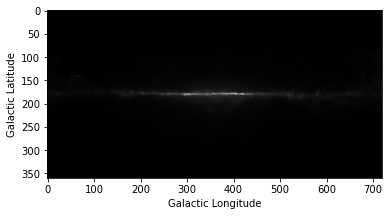

In [15]:
plt.imshow(data1, cmap='gray')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')

In [16]:
a = img_data[4]
b = img_data[9]
c = img_data[14]
d = img_data[-10]
e = img_data[-5]
f = img_data[-1]
data2 = a + b + c + d + e + f

In [17]:
np.std(data2)

3.5803188e-07

In [18]:
np.min(data2)

1.2772909e-08

In [19]:
np.max(data2)

1.0906455e-05

Text(0, 0.5, 'Galactic Latitude')

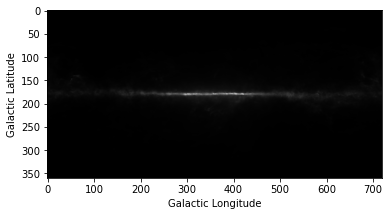

In [20]:
plt.imshow(data2, cmap='gray')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')

In [21]:
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time

In [32]:
def plt_altitude(coordinates,TIME):
    iitm = EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)
    time = Time(TIME) - 5.5*u.hour
    delta_time= np.linspace(0,12,1000)*u.hour
    coords_h = coordinates.transform_to(AltAz(obstime=time + delta_time , location=iitm))
    altitude = coords_h.alt
    plt.plot(delta_time,altitude,color='cyan')
    plt.xlabel('Delta_time')
    plt.ylabel('Altitude')
    plt.title('Altitude of celestial object over time window of 12 hours')
    ax = plt.axes()
    ax.set_facecolor("black")
    plt.show()

<ipython-input-32-6959ce2330f8>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


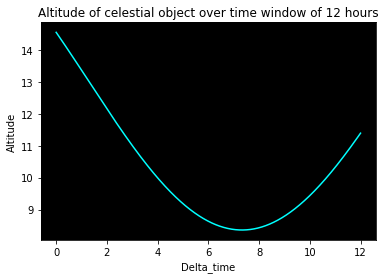

In [33]:
plt_altitude( SkyCoord(12.11*u.deg, 85.26*u.deg),'2021-07-15 10:06:00')